<a href="https://colab.research.google.com/github/272572PPiwnicki/demosaicking/blob/main/zastosowaniekonwolucji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from skimage import io
from scipy.ndimage import convolve
from numpy import dstack
import matplotlib.pyplot as plt

laplace = np.array(
    [[0, 1, 0],
     [1, -4, 1],
     [0, 1, 0]]
)

sobel_vertical = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
)

sobel_horizontal = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)

prewitt_vertical = np.array(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]]
)

prewitt_horizontal = np.array(
    [[1, 1, 1],
     [0, 0, 0],
     [-1, -1, -1]]
)

basic_gauss_blur_3x3 = np.array(
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]]
) / 16

basic_gauss_blur_5x5 = np.array(
    [[1, 4, 6, 4, 1],
     [4, 16, 24, 16, 4],
     [6, 24, 36, 24, 6],
     [4, 16, 24, 16, 4],
     [1, 4, 6, 4, 1]]
) / 256

basic_sharpening = np.array(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]]
)
unsharp_masking = np.array(
     [[1, 4, 6, 4, 1],
     [4, 16, 24, 16, 4],
     [6, 24, -476, 24, 6],
     [4, 16, 24, 16, 4],
     [1, 4, 6, 4, 1]]
) / -256

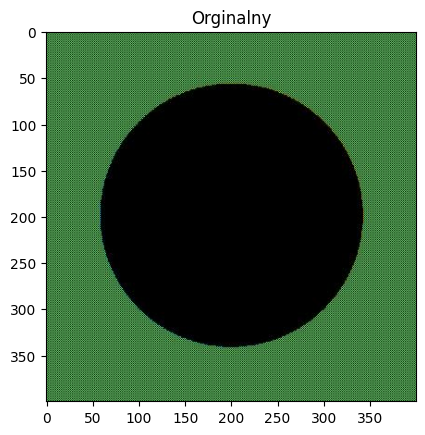

In [15]:
image_circle = io.imread("circle.jpg")
plt.imshow(image_circle)
plt.title("Orginalny")
plt.show()

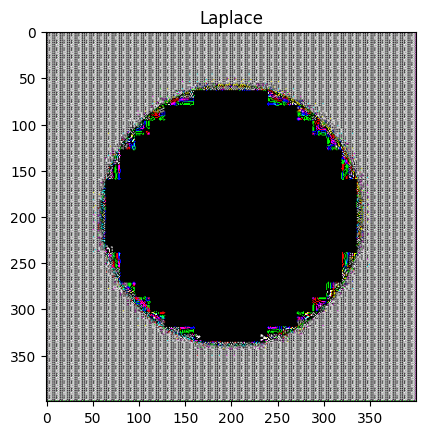

In [16]:
laplace_filtered_image = np.dstack([
    convolve(image_circle[:, :, channel], laplace, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(laplace_filtered_image)
plt.title("Laplace")
plt.show()

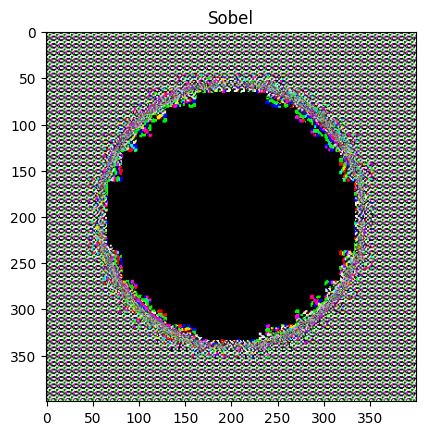

In [17]:
sobel_filtered_image = np.dstack([
    convolve(image_circle[:, :, channel], sobel_horizontal, mode="constant", cval=0.0)
    for channel in range(3)
])
sobel_filtered_image = np.dstack([
    convolve(sobel_filtered_image[:, :, channel], sobel_vertical, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(sobel_filtered_image)
plt.title("Sobel")
plt.show()

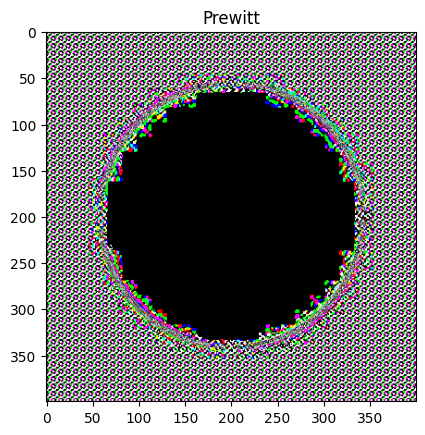

In [18]:
prewitt_filtered_image = np.dstack([
    convolve(image_circle[:, :, channel], prewitt_horizontal, mode="constant", cval=0.0)
    for channel in range(3)
])
prewitt_filtered_image = np.dstack([
    convolve(prewitt_filtered_image[:, :, channel], prewitt_vertical, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(prewitt_filtered_image)
plt.title("Prewitt")
plt.show()

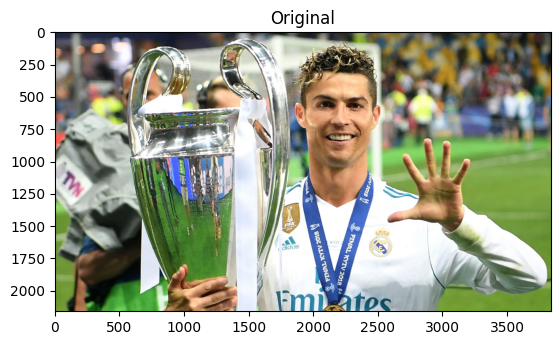

In [19]:
image_cr7 = io.imread("zdjecie.jpg")
plt.imshow(image_cr7)
plt.title("Original")
plt.show()

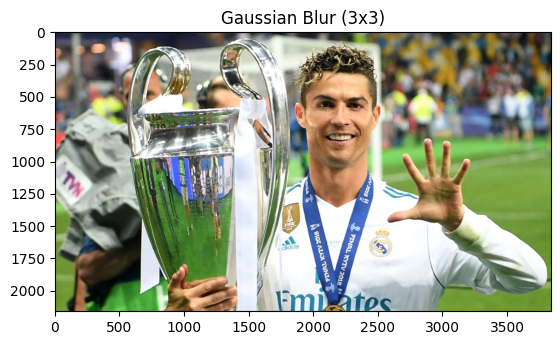

In [20]:
gauss_blur_3x3_image = np.dstack([
    convolve(image_cr7[:, :, channel], basic_gauss_blur_3x3, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(gauss_blur_3x3_image)
plt.title("Gaussian Blur (3x3)")
plt.show()

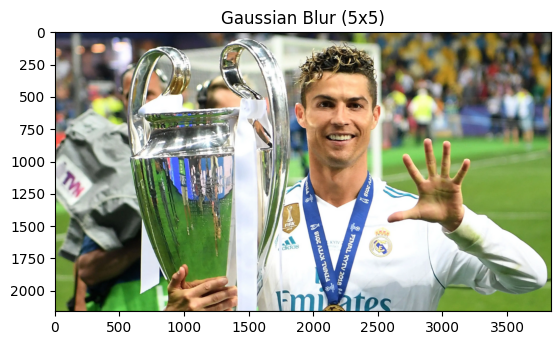

In [21]:
gauss_blur_5x5_image = np.dstack([
    convolve(image_cr7[:, :, channel], basic_gauss_blur_5x5, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(gauss_blur_5x5_image)
plt.title("Gaussian Blur (5x5)")
plt.show()

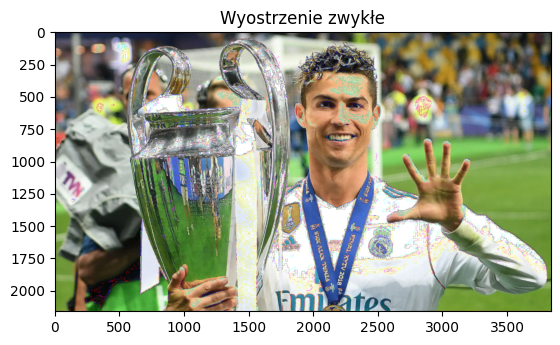

In [22]:
sharpened_image = np.dstack([
    convolve(image_cr7[:, :, channel], basic_sharpening, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(sharpened_image)
plt.title("Wyostrzenie zwykłe")
plt.show()

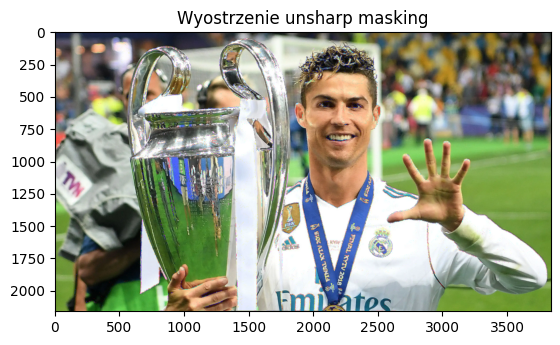

In [23]:
unsharp_masking_image = np.dstack([
    convolve(image_cr7[:, :, channel], unsharp_masking, mode="constant", cval=0.0)
    for channel in range(3)
])

plt.imshow(unsharp_masking_image)
plt.title("Wyostrzenie unsharp masking")
plt.show()